In [1]:
from models import *
from traitementimages import *
import tensorflow as tf

B = 5
epochs = 5
loss = tf.keras.losses.MeanSquaredError()
dataset = "Dataset_Test"
a, b = min_dim(dataset)
dim_entrainement=(a//4,b//4, 3)
print(dim_entrainement)
model = create_model(B, dim_entrainement)
img_entrainement = crop_dataset_upscale(dataset)
img_downscale = resize_dataset(dataset)

img_entrainement = tf.convert_to_tensor(img_entrainement)
img_downscale = tf.convert_to_tensor(img_downscale)

train_model(img_downscale, img_entrainement, epochs, model, loss, batch_size=128)


100%|██████████| 2274/2274 [00:32<00:00, 69.97it/s]


(22, 17, 3)


100%|██████████| 2274/2274 [01:08<00:00, 33.11it/s]


Epoch 1/5
18/18 [==============================] - 20s 294ms/step - loss: 0.1329
Epoch 2/5
18/18 [==============================] - 3s 163ms/step - loss: 0.0767
Epoch 3/5
18/18 [==============================] - 3s 164ms/step - loss: 0.0743
Epoch 4/5
18/18 [==============================] - 3s 164ms/step - loss: 0.0731
Epoch 5/5
18/18 [==============================] - 3s 161ms/step - loss: 0.0719


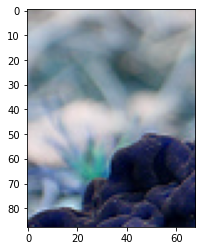

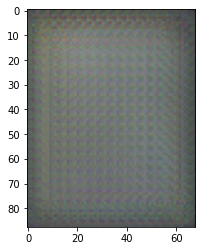

In [19]:
import matplotlib.pyplot as plt
import numpy as np
i = 9
plt.figure()
plt.imshow(img_entrainement[i])
plt.figure()
img_test = img_downscale[i].numpy()
img_test = np.expand_dims(img_downscale[i], 0)

plt.imshow(model.predict(img_test)[0])
